# Line Plots with Multifeatures

In [8]:
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

# Defining color palette
palette = sns.color_palette('rocket_r')

nuqta = sns.load_dataset("dots")
nuqta.head()




,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


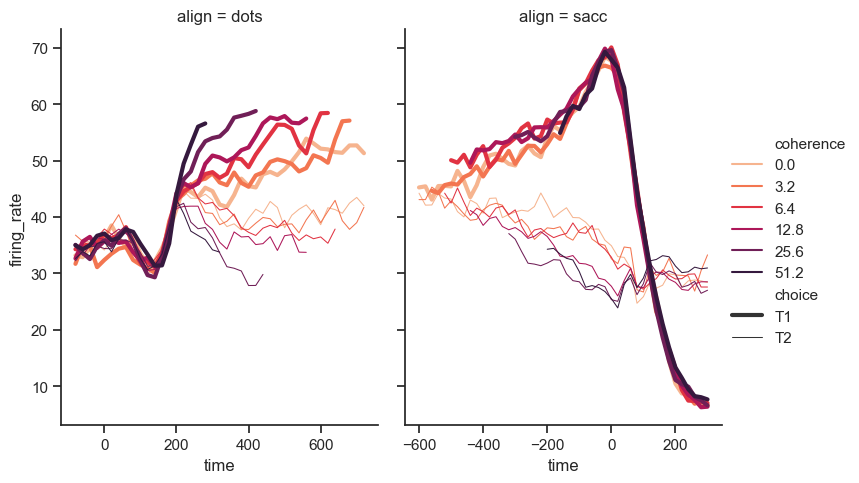

In [18]:
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme(style="ticks")

# Defining color palette
p = sns.color_palette('rocket_r')

# Plot Lineplote
sns.relplot(data = nuqta,
            x="time", y="firing_rate",
            hue = "coherence", size="choice", col="align",
            kind="line", size_order=["T1","T2"], palette=p,
            height=5, aspect=.75, facet_kws= dict(sharex=False),)

AttributeError: module 'seaborn' has no attribute 'despline'

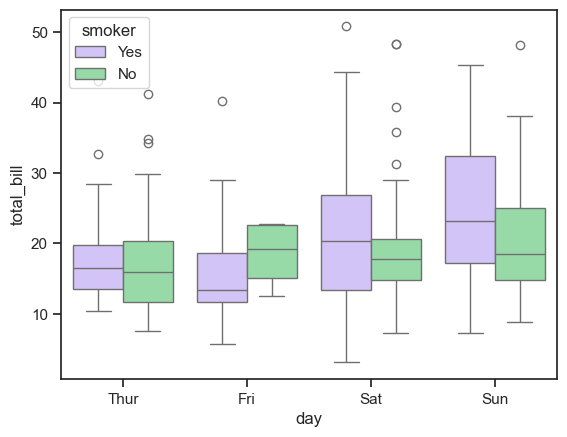

In [22]:
import seaborn as sns
sns.set_theme(style="ticks", palette = "pastel")

# load the exemple of tips datasets
tips = sns.load_dataset("tips")

# Draw the nested boxplot to show the bill and time
sns.boxplot(x="day", y = "total_bill",
            hue = "smoker", palette = ("m", "g"),
            data=tips)
sns.despline(offset=10, trim=True)


TypeError: despine() got an unexpected keyword argument 'lef'

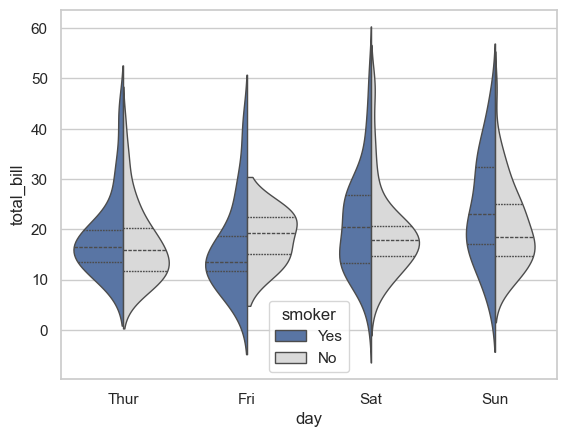

In [30]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# load the exemple of tips datasets
tips = sns.load_dataset("tips")

# Draw the nested willen plot and split the willen for easy comperasion
sns.violinplot(data=tips, x="day", y = "total_bill", hue = "smoker", 
               split=True, inner="quart", linewidth=1,
               palette = {"Yes": "b", "No": ".85"})
sns.despine(lef=True)

<Axes: xlabel='carat', ylabel='price'>

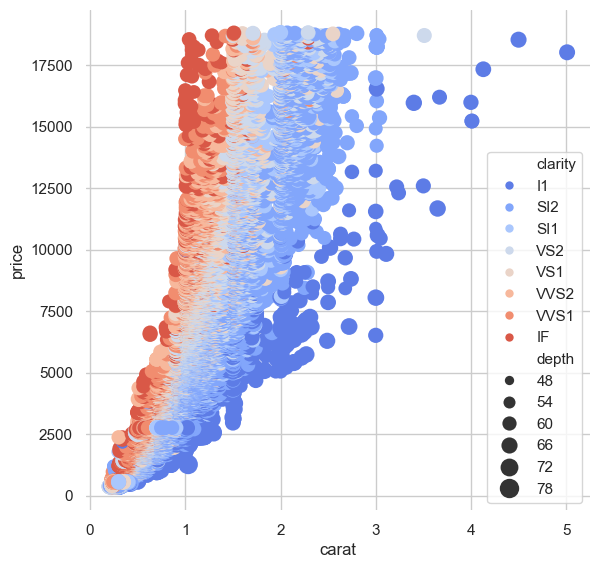

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Load the example diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Corrected clarity ranking
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

# Draw the scatter plot
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(
    x="carat", y="price", 
    hue="clarity", size="depth",
    palette="coolwarm",  # Replace with a valid colormap if needed
    hue_order=clarity_ranking,
    sizes=(20, 200), linewidth=0,
    data=diamonds, ax=ax
)


               


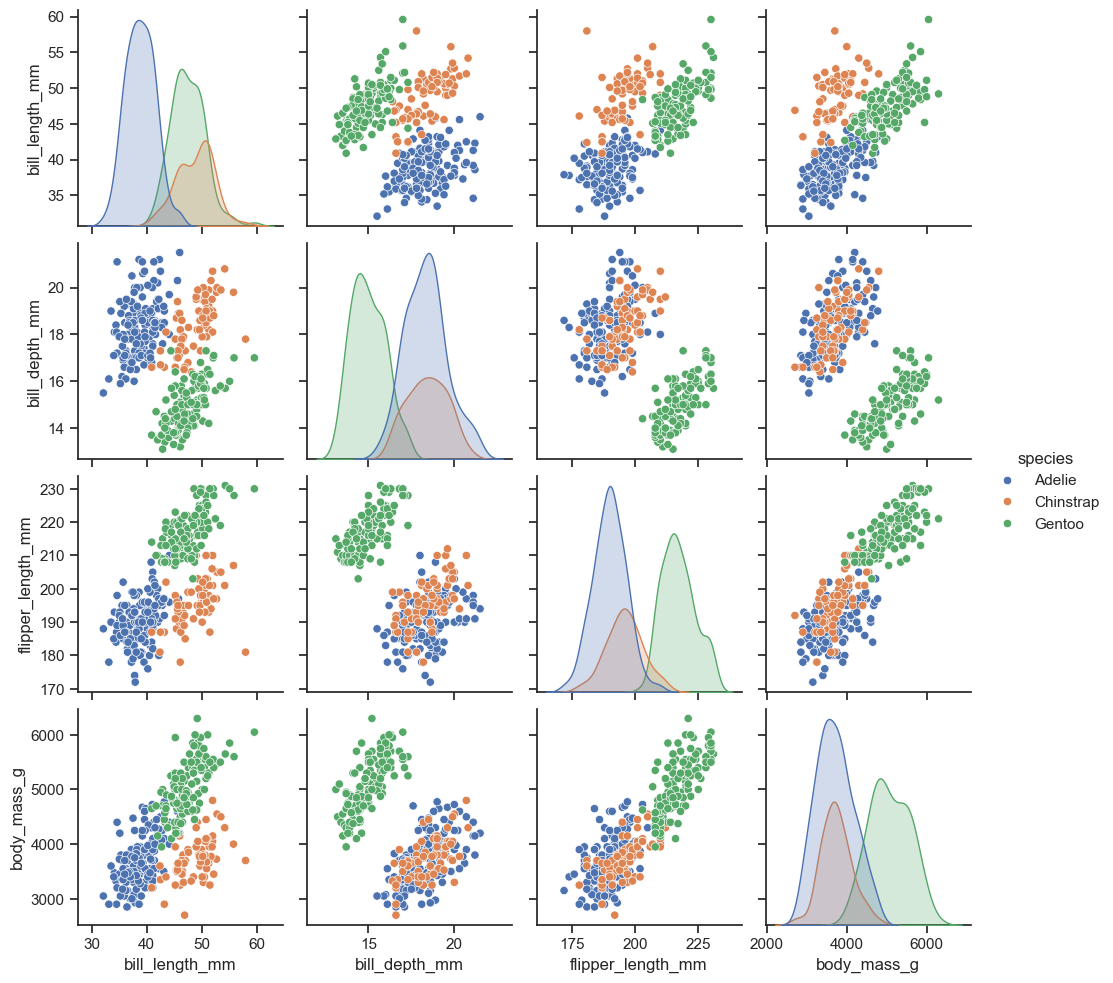

In [48]:
import seaborn as sns
sns.set_theme(style="ticks")

df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

<Axes: xlabel='day', ylabel='total_bill'>

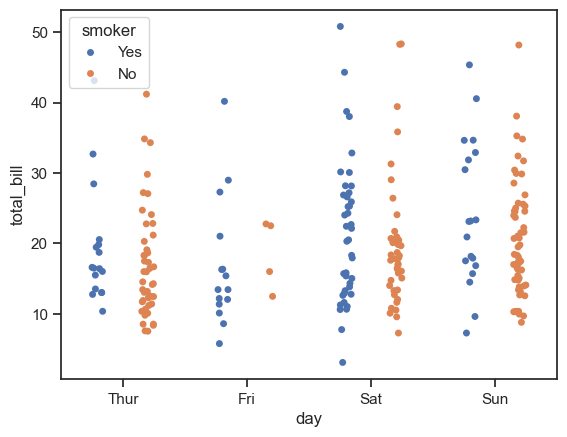

In [50]:
# import the seaborn library 
import seaborn as sns 
  
# reading the dataset 
df = sns.load_dataset('tips') 
sns.stripplot(x='day', y='total_bill', data=df, 
              jitter=True, hue='smoker', dodge=True)

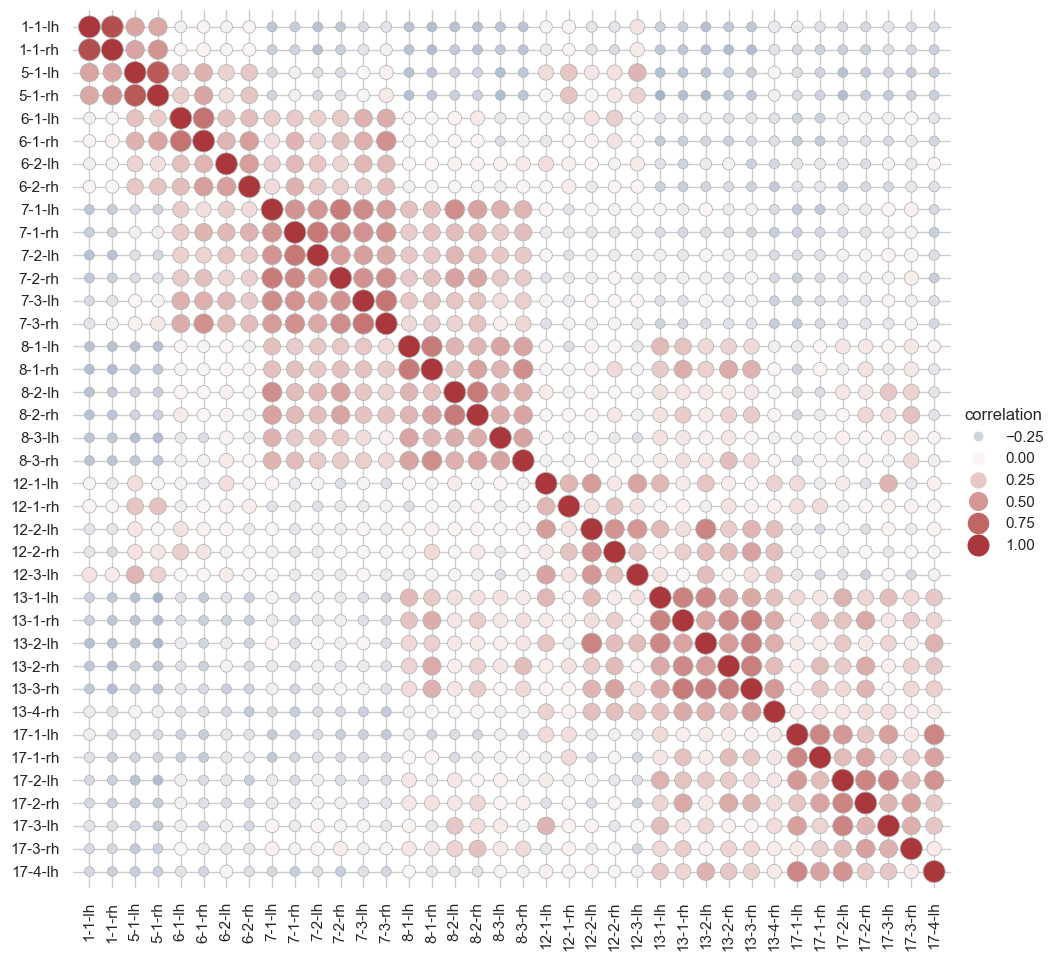

In [52]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the brain networks dataset, select subset, and collapse the multi-index
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns
                  .get_level_values("network")
                  .astype(int)
                  .isin(used_networks))
df = df.loc[:, used_columns]

df.columns = df.columns.map("-".join)

# Compute a correlation matrix and convert to long-form
corr_mat = df.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)

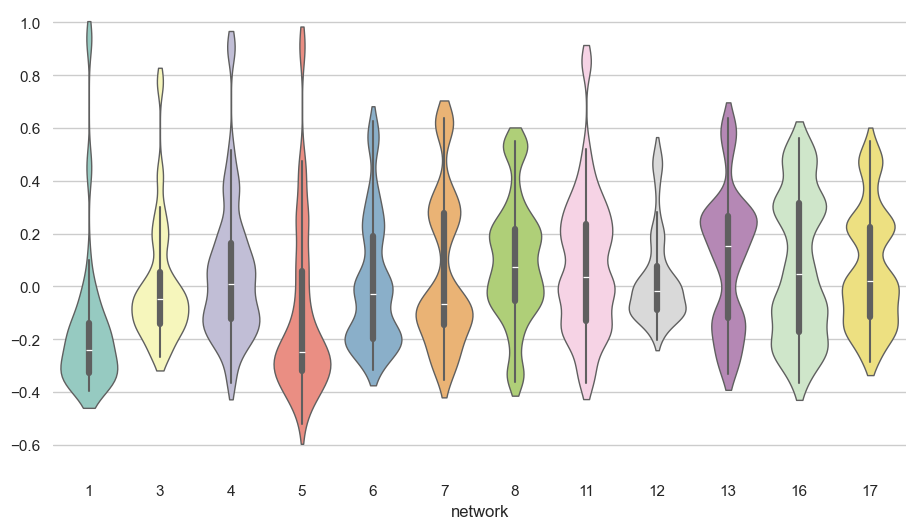

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Load the example dataset of brain network correlations
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Pull out a specific subset of networks
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Compute the correlation matrix and average over networks
corr_df = df.corr().groupby(level="network").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, bw_adjust=.5, cut=1, linewidth=1, palette="Set3")

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

<Axes: xlabel='clarity', ylabel='carat'>

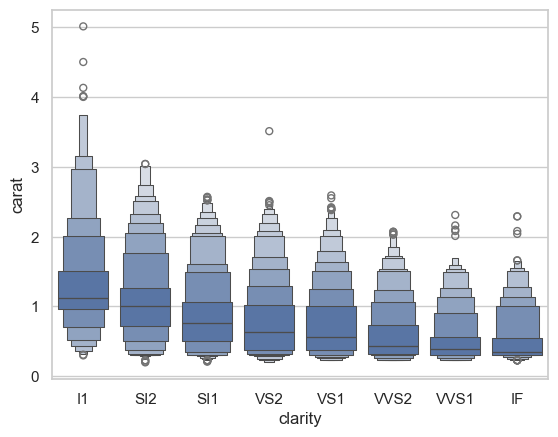

In [56]:
import seaborn as sns
sns.set_theme(style="whitegrid")

diamonds = sns.load_dataset("diamonds")
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

sns.boxenplot(
    diamonds, x="clarity", y="carat",
    color="b", order=clarity_ranking, width_method="linear",
)